In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [21]:
df = pd.read_csv('data_sets\\Family Income and Expenditure.csv')

In [22]:
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [23]:
df.isnull().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

In [24]:
df.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

<h1>Question 1</h1>
<h3>Wich region spends the most on food, and what might this indicate about the lifestyle and living costs in that region?</h3>

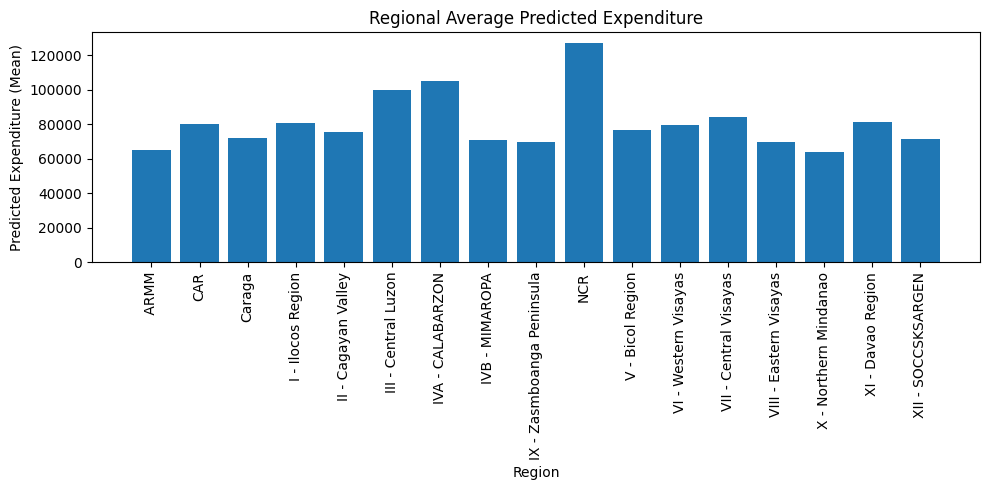

In [25]:
expense_col = "Total Food Expenditure"

region_mean = df.groupby("Region")[expense_col].mean()

plt.figure(figsize=(10,5))
plt.bar(region_mean.index, region_mean.values)
plt.xticks(rotation=90)
plt.title("Regional Average Predicted Expenditure")
plt.ylabel("Predicted Expenditure (Mean)")
plt.xlabel("Region")
plt.tight_layout()
plt.show()


<h2>INSIGHT:</h2>
<H4>This barchart clearly shows that NCR households spend the most on food, standing noticeably higher than any other region.
This suggests that living costs and household consumption patterns in NCR are significantly higher, meaning future predictions will likely place NCR as a consistent top spender due to its urban lifestyle, higher prices, and greater access to food establishments.</H4>

<h1>Question 2:</h1>
<h3>Which region has the highest average total household income?</h3>

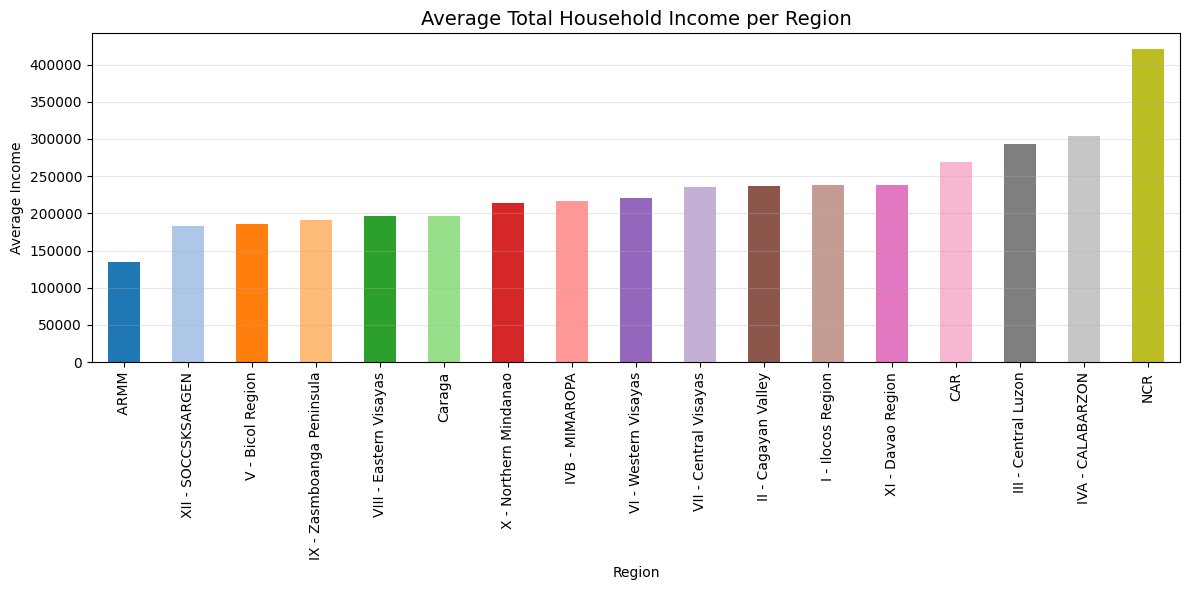

In [26]:
df_clean = df.fillna(df.median(numeric_only=True))

income_per_region = df_clean.groupby('Region')['Total Household Income'].mean().sort_values()

plt.figure(figsize=(12,6))
colors = sns.color_palette("tab20", len(income_per_region))

income_per_region.plot(kind='bar', color=colors)

plt.title("Average Total Household Income per Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Average Income")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<h2>INSIGHT:</h2>
<H4>The NCR region has the highest average household income, going over 4,000,000, which is much higher than other regions. This is likely because there are better job opportunities and a stronger local economy there. On the other hand, regions with lower incomes  like ARMM Region might need extra support to help improve their living conditions.</H4>

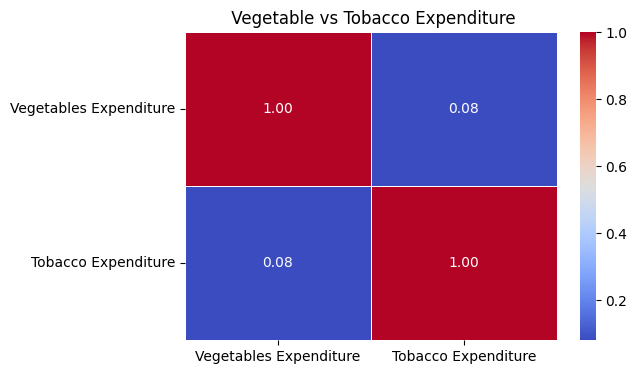

In [27]:
selected_cols = ['Vegetables Expenditure', 'Tobacco Expenditure']

# Create correlation table
corr = df[selected_cols].corr()

# Draw heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title(" Vegetable vs Tobacco Expenditure")
plt.show()

<h2>INSIGHT:</h2>
<H4>The heatmap shows the relationship between vegetable and tobacco spending in households. The correlation is very weak, which means that how much a household spends on vegetables does not affect how much they spend on tobacco. This tells us that food choices and tobacco use are separate habits and are not connected in spending patterns.</H4>

<H2>PREDICTIVE 1</H2>

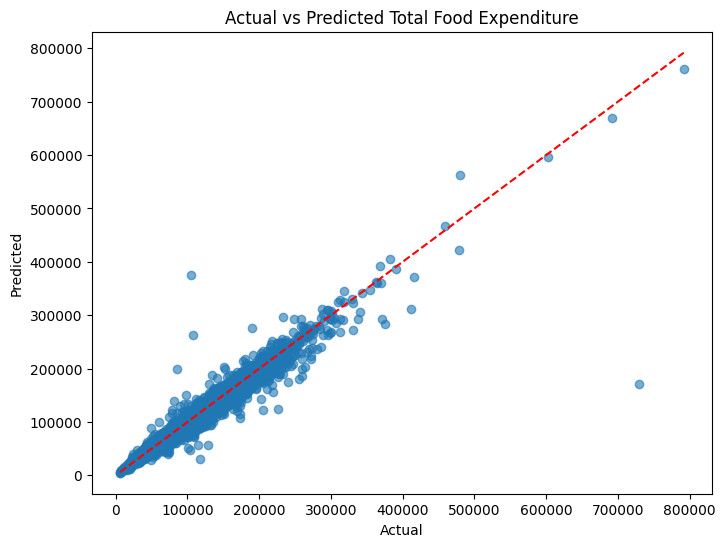

Mean Absolute Error (MAE): 5401.20
Root Mean Squared Error (RMSE): 11208.14
R² Score: 0.95


In [40]:
X = df.select_dtypes(include='number').drop(columns=['Total Food Expenditure'])
y = df['Total Food Expenditure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted Total Food Expenditure")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

<H1>INSIGHT:</H1>
<H3>The Actual vs Predicted plot shows that the model understands the general pattern of household spending, as most predicted values rise when the actual values rise. This means the model can capture the overall trend. However, many points still fall away from the ideal diagonal line, which shows that the model struggles to predict the exact amounts. It sometimes guesses too high or too low, indicating that important factors may be missing or too complex for the model to capture. Overall, the model has a basic understanding of the data but lacks strong accuracy.
</H3>

<H2>PREDICTIVE 2</H2>

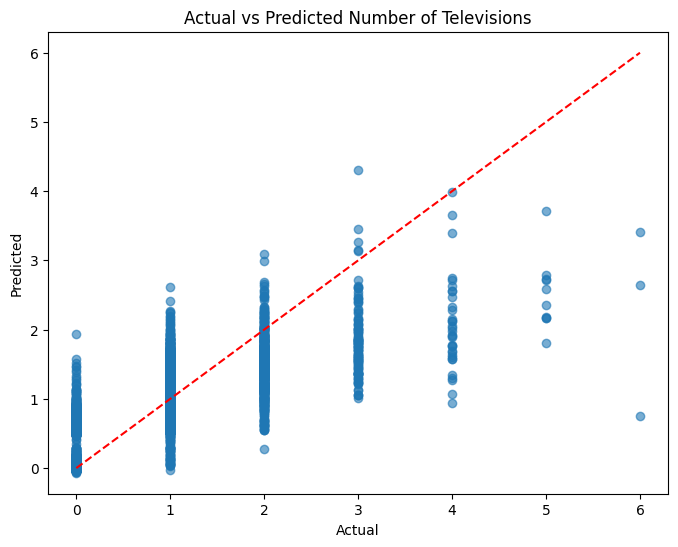

Mean Absolute Error (MAE): 0.34
Root Mean Squared Error (RMSE): 0.46
R² Score: 0.50


In [41]:
y = df["Number of Television"]

X = df.select_dtypes(include='number').drop(columns=["Number of Television"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted Number of Televisions")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")



<H1>INSIGHT:</H1>
<H3>The model shows that it can recognize the general trend in how many televisions a household owns. As the actual number increases, the predicted values also increase. However, the predictions are not very precise, and many do not fall close to the ideal line. This means the model can understand the pattern but cannot accurately predict the exact number of televisions. Household choices about appliances may depend on lifestyle or preferences that are not fully captured in the dataset.
</H3>

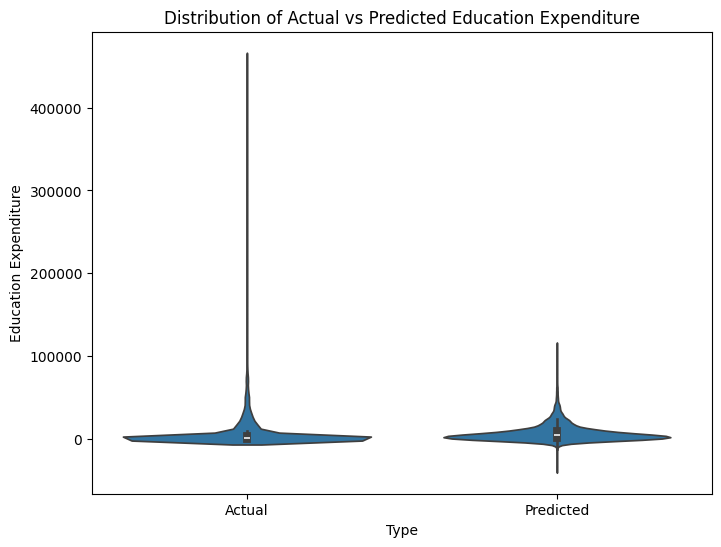

Mean Absolute Error (MAE): 8132.03
Root Mean Squared Error (RMSE): 16925.30
R² Score: 0.26


In [30]:

X = df.select_dtypes(include='number').drop(columns=['Education Expenditure'])
y = df['Education Expenditure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


plot_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})


plot_df_melt = plot_df.melt(var_name='Type', value_name='Education Expenditure')


plt.figure(figsize=(8,6))
sns.violinplot(x='Type', y='Education Expenditure', data=plot_df_melt)
plt.title("Distribution of Actual vs Predicted Education Expenditure")
plt.show()

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


<H1>INSIGHT:</H1>
<H3>The violin plot shows the distribution of actual and predicted Education Expenditure for households. The predicted values generally follow the shape of the actual values, which means the model captures the overall spending pattern. However, the predicted distribution is slightly narrower, suggesting that the model struggles to capture the extreme high or low spending, so it is better at predicting typical household expenditures than very large or very small amounts.
</H3>

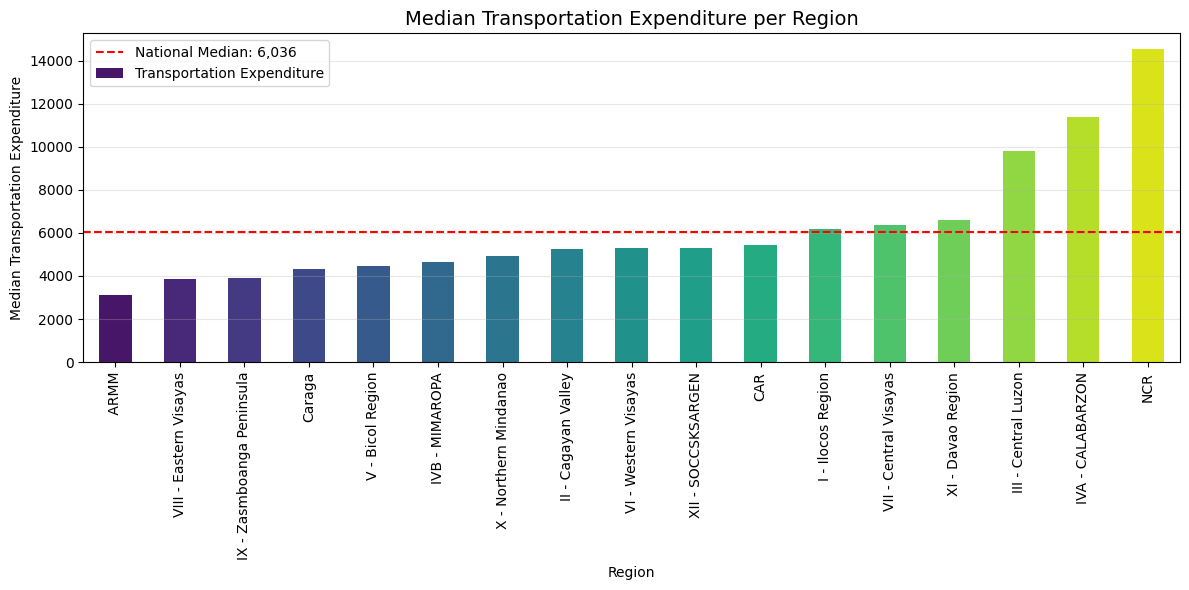

Region closest to the national median for transportation expenditure: 6186.0


In [34]:
transportation_expenditure_per_region_median = df_clean.groupby('Region')['Transportation Expenditure'].median().sort_values()

national_median_transportation = df_clean['Transportation Expenditure'].median()

plt.figure(figsize=(12,6))
colors = sns.color_palette("viridis", len(transportation_expenditure_per_region_median))

transportation_expenditure_per_region_median.plot(kind='bar', color=colors)

plt.axhline(national_median_transportation, color='red', linestyle='--', label=f'National Median: {national_median_transportation:,.0f}')

plt.title("Median Transportation Expenditure per Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Median Transportation Expenditure")
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

closest_region_transportation = transportation_expenditure_per_region_median.iloc[
    (transportation_expenditure_per_region_median - national_median_transportation).abs().argmin()]
print(f"Region closest to the national median for transportation expenditure: {closest_region_transportation}")





<H1>INSIGHT:</H1>
<H3>The region with the median transportation expenditure closest to the national average indicates where transportation costs are aligned with overall trends in the country. This information can be useful for understanding regional differences in spending priorities and evaluating whether certain areas may need more support in managing transportation costs.
</H3>

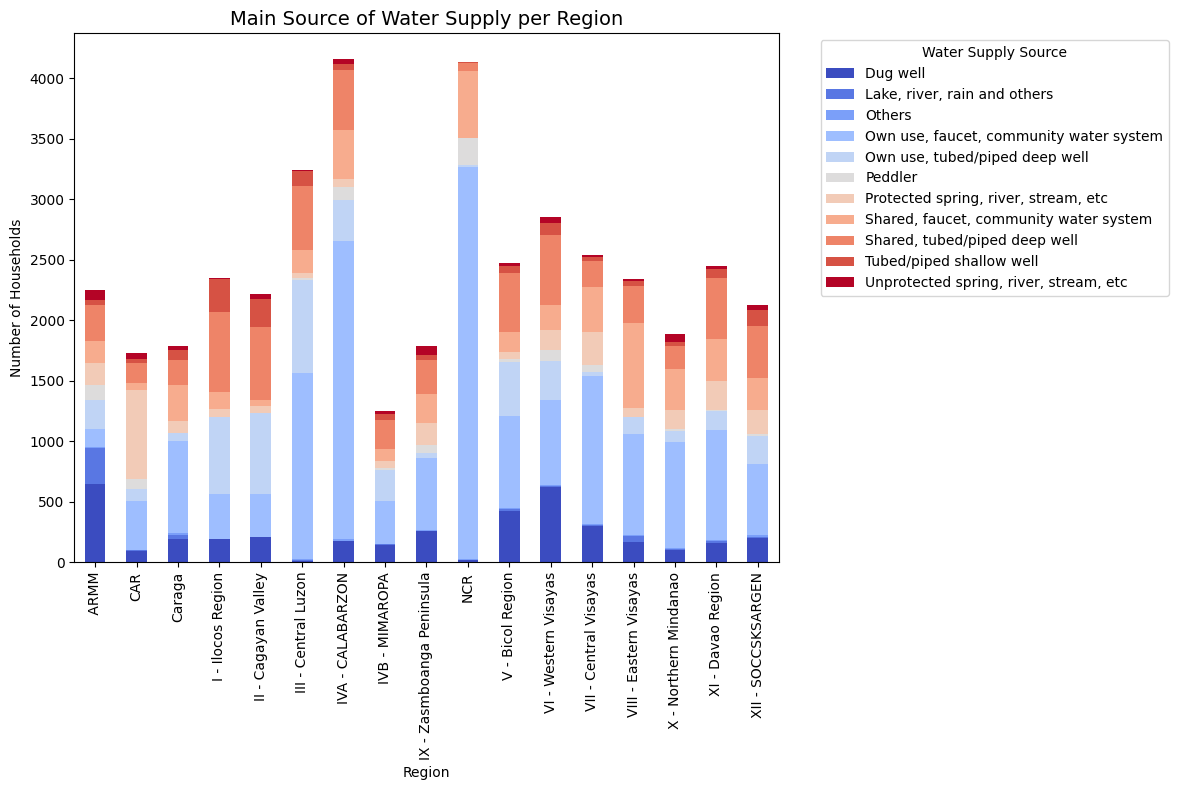

In [46]:
water_supply_region = df_clean.groupby('Region')['Main Source of Water Supply'].value_counts().unstack().fillna(0)

ax = water_supply_region.plot(kind='bar', stacked=True, figsize=(12,8), cmap="coolwarm")

plt.title("Main Source of Water Supply per Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Number of Households")
plt.legend(title="Water Supply Source", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<H1>INSIGHT:</H1>
<H3>This bar chart shows the primary sources of water across different regions. It reveals that regions like NCR and CALABARZON rely heavily on piped water, while areas like ARMM and Soccsksargen depend more on dug wells and other alternative water sources. This highlights the disparity in access to clean water across regions and emphasizes the need for improved water infrastructure in areas with limited access.
</H3>

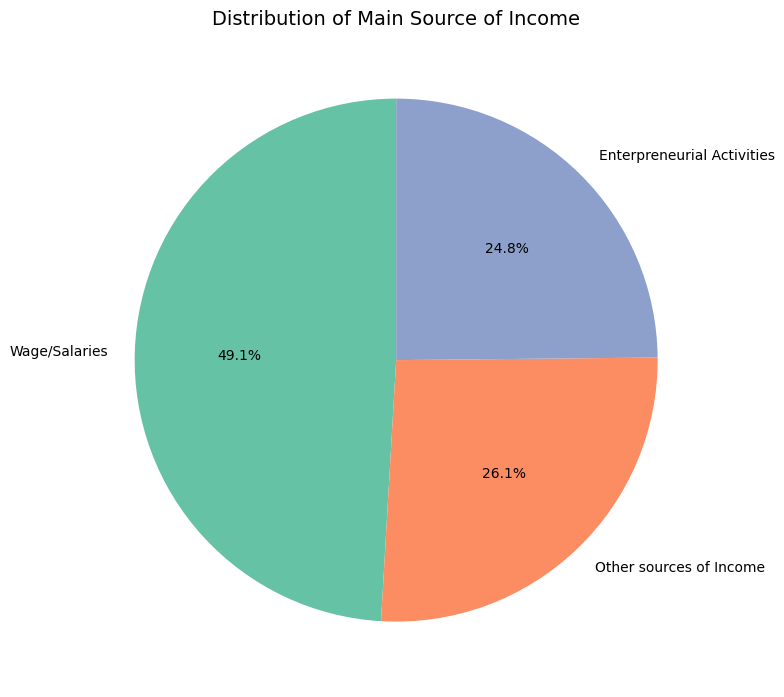

In [57]:
income_source_counts = df['Main Source of Income'].value_counts()

plt.figure(figsize=(8,8))
income_source_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(income_source_counts)))
plt.title("Distribution of Main Source of Income", fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()



<H1>INSIGHT:</H1>
<H3>This pie chart illustrates the distribution of the main sources of income among households. Wages/Salaries are the primary income source for nearly half of the households, making up 49.1%, reflecting the reliance on formal employment. Other Sources of Income** account for 26.1%, possibly including pensions, remittances, or occasional earnings, while Entrepreneurial Activities represent 24.8%, indicating a significant portion of the population relies on self-employment and business ventures for their livelihoods. This distribution highlights the diverse income generation strategies, with formal employment being the dominant source.</H3>

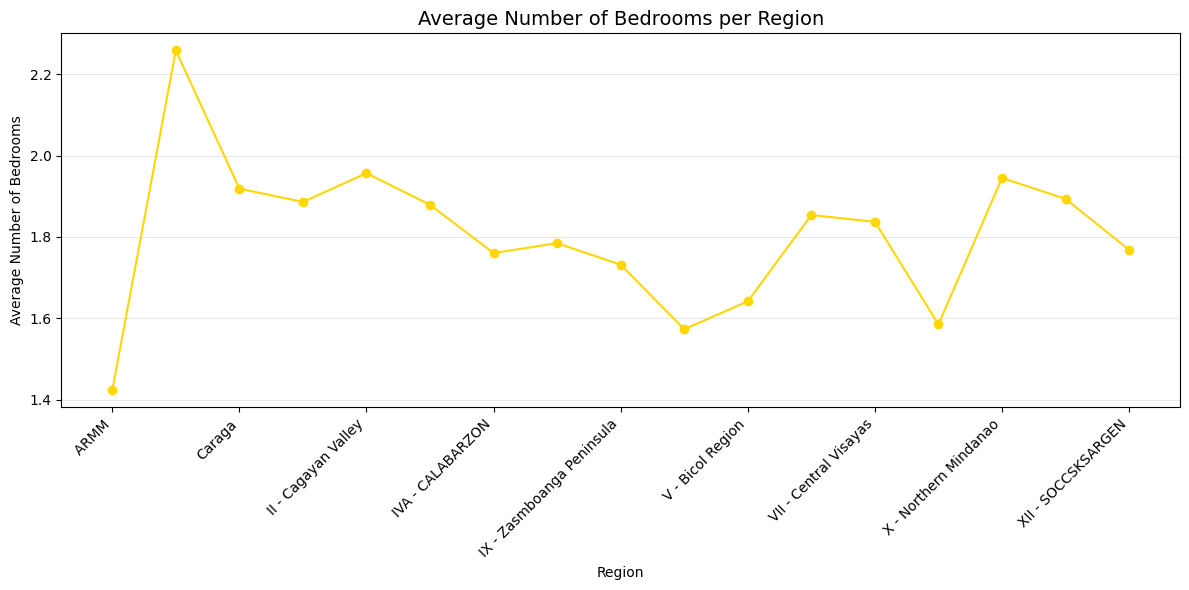

In [61]:
avg_bedrooms_per_region = df.groupby('Region')['Number of bedrooms'].mean()

plt.figure(figsize=(12,6))
avg_bedrooms_per_region.plot(kind='line', marker='o', color='gold')
plt.title("Average Number of Bedrooms per Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Average Number of Bedrooms")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()




<H1>INSIGHT:</H1>
<H3>This line chart displays the average number of bedrooms per region, offering a clear view of housing sizes across the country. ARMM stands out with the highest average number of bedrooms, suggesting larger or more spacious homes in that region, while regions like Caraga and Central Visayas show lower averages, indicating more modest living arrangements. The variability between regions emphasizes the regional disparities in housing sizes, which may reflect differences in economic conditions, available land, or housing policies.
</H3>